# Testing the python environment

With the following python code, we will learn to display meteorological data, both from a numerical model (like what you get from yr.no) and observations (taken from the GFI tower).  

More specifically, we will :
<ol>
<li>Import necessary python packages
<li>Read a NETCDF file and perform simple calculations
<li>Plot different meteorological data on a map (with a detailed coastline by using a particular file called a shapefile)
<li>Read a CSV file and perform simple calculations  
<li>Plot graphs
</ol>

**Requirements for running the code**

You need internet access to run this script since we are fetching a NetCDF file online. 

Please make sure you have the aditional files placed in the correct folder:
<li> In the same directory as this python file we need to have a folder named, "shapefiles" that contains multiple files starting with "Norway_h_utm"
<li> In the same directory as this python file we need a file named "Florida_AWS.csv"

<p> <p> The packages needed and how to download:  

|Package name| code for downloading   | info  | More info/tutorial |
|---|---|---|---|
| jupyter  | conda install -c anaconda jupyter | For running this jupyter notebook  |  https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#basic-workflow  |
| numpy  | conda install -c anaconda numpy | general-purpose array-processing package  | https://towardsdatascience.com/the-easiest-python-numpy-tutorial-ever-5c206c809a0d |
| matplotlib  | conda install -c anaconda matplotlib | For nice plotting functions |  https://matplotlib.org |
| netcdf4  | conda install -c anaconda netcdf4  | For reading netcdf files  |  https://unidata.github.io/netcdf4-python/netCDF4/index.html |
| cartopy  | conda install -c conda-forge cartopy | For making a map  | https://scitools.org.uk/cartopy/docs/latest/#getting-started  |
| pandas  | conda install -c anaconda pandas  |  For reading csv files and other data manipulations | https://pandas.pydata.org/docs/getting_started/10min.html#min |

## 1. Import necessary python packages

In [1]:
from netCDF4 import Dataset                     #For reading netcdf files.
import cartopy.crs as ccrs                      #For setting up a map
from cartopy.io import shapereader              #For reading shapefiles containg high-resolution coastline.
import matplotlib.pyplot as plt                 #For basic plotting in python
import matplotlib.cm as cm                      #For colors on map 
import numpy as np                              #general-purpose array-processing package
import csv                                      #For reading csv files
import datetime as dt                           #For handling different dates
import matplotlib.dates as mdates               #For displaying different dates
import pandas as pd                             #For reading csv files and other data manipulations
#For more information of packages type feks. help(Dataset)

## 2. Read a NETCDF file and perform simple calculations

NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction.

**Get information about the NETCDF file:**

For reading a NetCDF file (grabbed from the web in this case), we use the *Dataset* function from the *netCDF4* package. 


In [2]:
filename = "https://thredds.met.no/thredds/dodsC/meps25epsarchive/2020/05/16/meps_det_2_5km_20200516T12Z.nc?time[0:1:0],longitude[0:1:1068][0:1:948],latitude[0:1:1068][0:1:948],relative_humidity_2m[0:1:0][0:1:0][0:1:1068][0:1:948],air_pressure_at_sea_level[0:1:0][0:1:0][0:1:1068][0:1:948],air_temperature_2m[0:1:0][0:1:0][0:1:1068][0:1:948],wind_direction[0:1:0][0:1:0][0:1:1068][0:1:948],wind_speed[0:1:0][0:1:0][0:1:1068][0:1:948],cloud_area_fraction[0:1:0][0:1:0][0:1:1068][0:1:948],wind_speed_of_gust[0:1:0][0:1:0][0:1:1068][0:1:948],precipitation_amount_acc[0:1:0][0:1:0][0:1:1068][0:1:948]"
datanc = Dataset(filename, "r")  #open the netcdf file information for reading (r)

*datanc* holds information about the entire dataset. We need to see what datanc contains to find the names and dimensions of the different variables. This can be done with just a simple print statement as bellow: 

In [3]:
print(datanc)     # get info about what this object contains

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.6
    institution: Norwegian Meteorological Institute, MET Norway
    creator_url: met.no
    source: MEPS 2.5km
    min_time: 2020-05-19 05:00:00Z
    max_time: 2020-05-19
    geospatial_lat_min: 49.8
    geospatial_lat_max: 75.2
    geospatial_lon_min: 18.1
    geospatial_lon_max: 54.2
    references: unknown
    license: https://www.met.no/en/free-meteorological-data/Licensing-and-crediting
    comment: none
    history: 2020-05-16T14:34:14 creation by fimex
    DODS_EXTRA.Unlimited_Dimension: time
    dimensions(sizes): time(1), height0(1), height1(1), height7(1), height_above_msl(1), x(949), y(1069)
    variables(dimensions): float64 time(time), float64 longitude(y,x), float64 latitude(y,x), float32 air_temperature_2m(time,height1,y,x), float32 relative_humidity_2m(time,height1,y,x), float32 cloud_area_fraction(time,height0,y,x), float32 air_pressure_at_sea_level(tim

From the information above, we find something called *variables*. Following this is a list of all the variables this dataset contains. Chose whatever variables you like. If we, for example, look at the variable; *air_pressure_at_sea_level*, we can see that this depends on the time, height, and the coordinates y and x. We can get more information about this variable before retrieving the actual data from it:

In [4]:
print(datanc.variables["air_pressure_at_sea_level"]) # get info about one of the variables

<class 'netCDF4._netCDF4.Variable'>
float32 air_pressure_at_sea_level(time, height_above_msl, y, x)
    _FillValue: 9.96921e+36
    long_name: Mean Sea Level Pressure (MSLP)
    standard_name: air_pressure_at_sea_level
    units: Pa
    grid_mapping: projection_lambert
    coordinates: longitude latitude
    _ChunkSizes: [   1    1 1069  949]
unlimited dimensions: time
current shape = (1, 1, 1069, 949)
filling off


From the above information, we note that *air_pressure_at_sea_level* has a unit in Pa. Also, note the info; *current shape = (1, 1, 1069, 949)* and *air_pressure_at_sea_level(time, height_above_msl, y, x)*, that tells us we only have one possible time and height level. Otherwise, we have 1069 points of data in the y-direction and 949 points in the x-direction.

**Extracting data from the NETCDF file**:

We can start retrieving the actual data. Depending on the size of the dataset, this can take time.

In [5]:
prec = datanc.variables["precipitation_amount_acc"][0][:] #time = 0 #Only one time
lon =  datanc.variables["longitude"][:]
lat =  datanc.variables["latitude"][:]
rh_dec = datanc.variables["relative_humidity_2m"][0][0][:] #time = 0, height=0 -> only one time and one height(at 2m)
slp_Pa = datanc.variables["air_pressure_at_sea_level"][0][0][:] #time=0, height=0 -> only one time and one height(at sea level)
t2m_K = datanc.variables["air_temperature_2m"][0][0][:] #time = 0, height=0  -> only one time and one height(at 2m)
wind_speed = datanc.variables["wind_speed"][0][0][:]  #time = 0, height=0  -> only one time and one height(at 10m)
wind_direction = datanc.variables["wind_direction"][0][0][:]  #time = 0, height=0  -> only one time and one height(at 10m)

#close netcdf file now that we have stored the variables we need.
datanc.close()

**Simple calculations for changing the unit**


In [6]:
rh = rh_dec * 100 # rh in %
slp = slp_Pa / 100. # Pa to hPa
t2m = t2m_K - 273.15# Kelvin to Celcius
u = -wind_speed * np.sin(np.deg2rad(wind_direction)) #m/s u wind 
v = -wind_speed * np.cos(np.deg2rad(wind_direction)) #m/s v wind

## 3. Plot different meteorological data on a map

To make a map, we use the package *catropy* with *matplotlib*. This package contains already coastlines of the world and many other helpful features for creating exactly the map we want.

To set up a map, we need to define:
<ol>

<li> The area of interest with latitude and longitude coordinates (using, for example, google map); extents = [lonmin, lonmax, latmin, latmax]
<ul>
<li> For entire Norway we can use; extents=[ -1, 20, 57, 70]. Good for a larger overview of what is going on
<li> For the westcoast, we can use; extents = [ 4., 6., 60., 61. ]. For investigating more local effect
<li> For byfjorden, we can use; extents = [ 5.05, 5.4, 60.35, 60.55 ] (Nice for the cruise we will have)
</ul>

<li> Type of projection.
<ul>
<li> The projection our data is in
<li> The projection we want to display
</ul>
</ol>

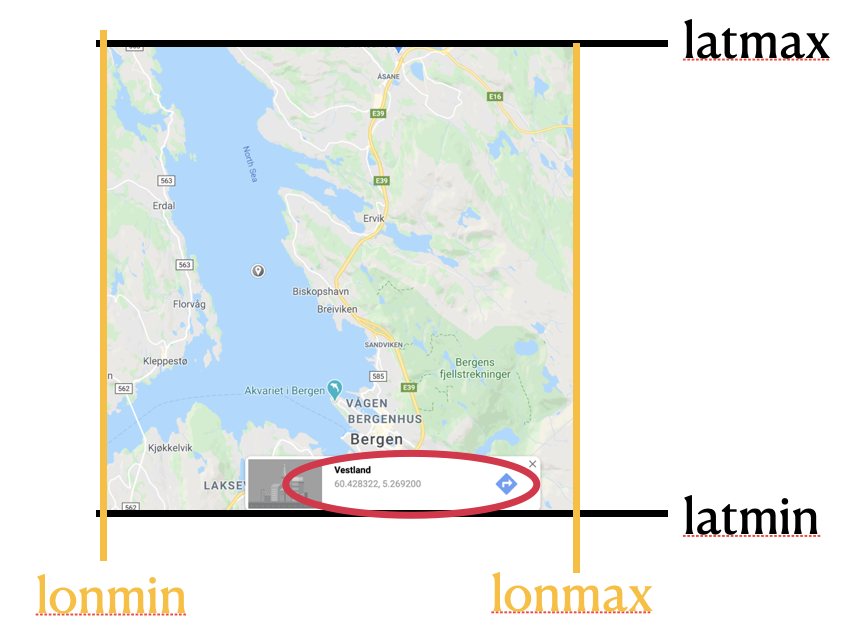

**Plotting a map overlayed with meteorological variables** 

When initiating a map, we usually start with defining the size and projection; 
<li>fig = plt.figure( figsize = ( xdirection, ydirection ) ) <li> ax = plt.axes( projection = display_proj )


<p><p>Note the different types of plot used here; 
<li> coastline( ) Built inn function in cartopy displaying the coastline in coarse resolution
<li> gridlines( ) Built inn function in cartopy displaying the gridlines for latitude and logitudes
<li> contour( )   Open contour line plot
<li> contourf( )  Filled contour line plot
<li> pcolormesh( )  Filled cells that are good for small areas needing more details
<li> plot( )      For plotting feks points on the map
<li> barbs( )     Gives us windbarbs (See W.H page 314 for an explenation on windbarbs) 

<p><p>We usually end with either;  
<li>plt.show( ) -----> Giving a nice display
<li>plt.savefig("Figname.png") ----> For saving it to a file

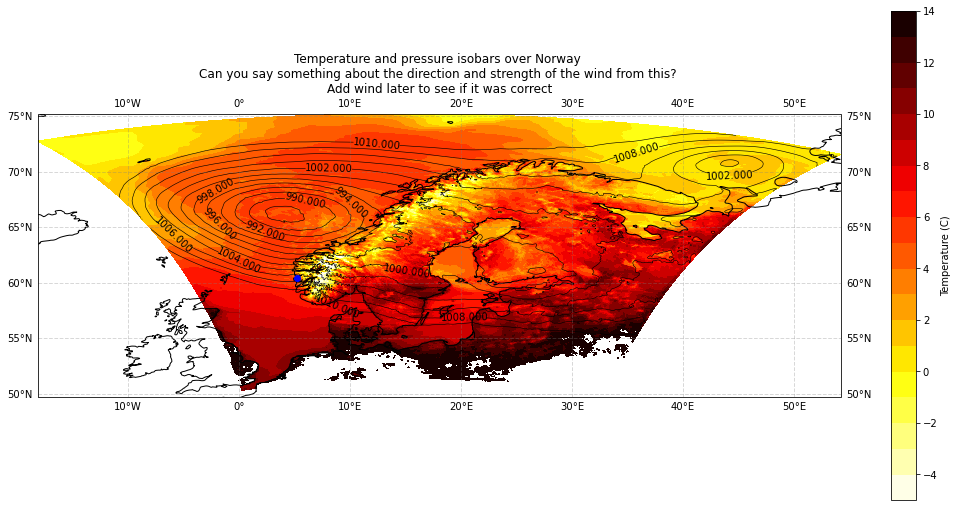

In [7]:
data_proj = ccrs.PlateCarree( ) # Projection our data is in
display_proj = ccrs.PlateCarree( ) # Projection we want to display in

fig = plt.figure( figsize = ( 18, 9 ) )
ax = plt.axes( projection = display_proj )  #Make an axis with a certain projection

ax.coastlines( ) #Loading the coastline
ax.gridlines( draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.3, linestyle = '--' ) #Adding latitude and longitude grids over the map

#Adding sea level pressure with a certain range
slp_range = np.arange( 800, 1012, 2 ) #what inteval we want our pressure contours. 
CS = plt.contour( lon, lat, slp, slp_range, colors = "black", linewidths = 0.6, transform = data_proj ) #open contours
plt.clabel(CS, inline=1, fontsize=10)
#Adding temperature with a certain colorfill and range
cmap = cm.get_cmap( 'hot_r' )      #Colors we want (https://matplotlib.org/2.0.1/users/colormaps.html)
tmp_range = np.arange( -5, 15, 1 ) #range
CF = ax.contourf( lon, lat, t2m,tmp_range, transform = data_proj, cmap = cmap ) #filled contours
cbar = plt.colorbar( CF ) # adding a colorbar
cbar.set_label( "Temperature (C)" )

#Position in Byfjorden 
ax.plot( 5.26, 60.42, "bo", transform = data_proj )

#ax.set_title(r'$\bf{Temperature}$ $\bf{and}$ $\bf{pressure}$ $\bf{isobars} $\bf{{over} {Norway}$ \n' + 
ax.set_title( 'Temperature and pressure isobars over Norway \n' + 
             'Can you say something about the direction and strength of the wind from this? \n'+
             'Add wind later to see if it was correct' )

#Adding winds
#step = 60 # interval between each windbar plotted
#ms2knots = 1.943844 #bars() need unit in knots
#ax.barbs( lon[::step,::step], lat[::step,::step],u[::step,::step]*ms2knots,v[::step,::step]*ms2knots, transform=data_proj)
#plt.savefig("AROME_PLOT1.png")
plt.show()

**Zooming in on a specific region**

We zoom in on the region of choice with; 
<li> ax.set_extent( extents = [ 4., 6., 60., 61. ] )
    
Where [ 4., 6., 60., 61. ] is the minimum/maximum longitude and latitude over the westcoast


Unfortunately, cartopy does not have a coastline detailed enough for many applications (like what we need). Therefore, I retrieved detailed coastline information stored in a file we call a **shapefile** (ends with .shp). 
A shapefile is a format used for storing geometric location and attribute information of geographic features. For reading a shapefile, we need at least additionally two more files, namely a ".shx" file and a ".dbf" file. For more info see; https://en.wikipedia.org/wiki/Shapefile

**NB!** Remember to place the folder "shapefiles" containing multiple files starting with "Norway_h_utm" inside the same directory as this python file.


In [8]:
file_path = 'shapefiles/Norway_h_utm.shp' #relative path to the file
shp = shapereader.Reader(file_path) # Read shapefiles

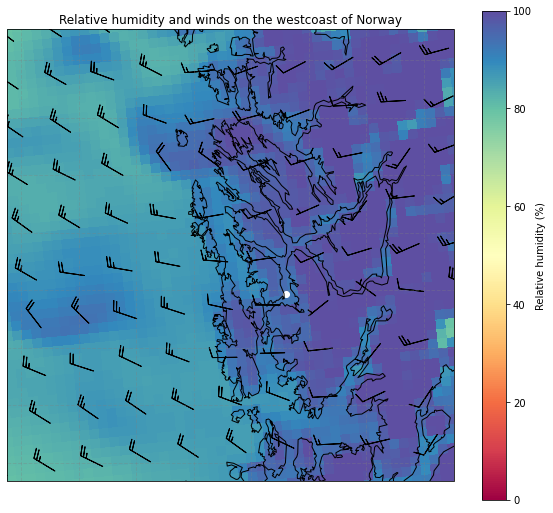

In [9]:
data_proj = ccrs.PlateCarree()
display_proj = ccrs.UTM( 32 )

fig_map = plt.subplots(figsize=(10, 9))
ax = plt.axes(projection = display_proj)

ax.set_extent( extents = [ 4., 6., 60., 61. ] ) #Zooming in on a specific region

ax.add_geometries( shp.geometries(), crs=ccrs.UTM( 32 ), facecolor='none', edgecolor='black', zorder=2 ) #instead of ax.coastline()
ax.gridlines(crs=display_proj, draw_labels=False, linewidth=1, color='gray', alpha=0.3, linestyle='--')

#Adding relative humidity
cmap = cm.get_cmap( 'Spectral' ) #Colors we want (https://matplotlib.org/2.0.1/users/colormaps.html)
CS = ax.pcolormesh( lon, lat, rh, transform=data_proj, vmin=0,vmax=100, cmap = cmap)
cbar = plt.colorbar(CS) #Add colorbar
cbar.set_label("Relative humidity (%)") #Add labels

#Adding winds
step = 5
ms2knots = 1.943844
CV = ax.barbs( lon[::step,::step], lat[::step,::step], u[::step,::step]*ms2knots, v[::step,::step]*ms2knots, transform=data_proj)

#Position in Byfjorden 
ax.plot(5.26,60.42, "wo", transform=data_proj)

ax.set_title( 'Relative humidity and winds on the westcoast of Norway' )
#plt.savefig("AROME_PLOT2.png")
plt.show()

**Byfjorden**

Try to use the code above in the empty cell under to make a new map zoomed into byfjorden. This will be used your report for the coming boatcruise we will have. For byfjorden you can use: extents = [ 5.05, 5.4, 60.35, 60.55 ]

Also feel free to plot any other variables, with any colors you like (color option found here: https://matplotlib.org/2.0.1/users/colormaps.html). 

In [10]:
#YOUR CODE HERE

## 4. Read a CSV file and perform simple calculations ( With the Pandas package)
Comma Separated Values (CSV) file is a plain text file that contains a list of data. We will read the Florida_AWS.csv file that contains observations from GFI, and plot these in different ways. 

Two popular packages for reading a CSV file is either the CSV-package or the pandas-package. You can choose what you like the most. Pandas is a package that requires a bit more reading up on but is highly recommended. I will show both here, starting with pandas.


**Utilizing the pandas package**

Pandas is a very useful Python package to learn if you are going to work and make sense of large amount of data.
It provides a fast and intuitive way of displaying and structure your data by using either Series (1-dimensional) or DataFrame (2-dimensional).

For a more tutorial about the package pandas; https://www.learnpython.org/en/Pandas_Basics


In [11]:
file = 'Florida_AWS.csv'
data = pd.read_csv(file)
#setting the indexes of the data as a datetime object.
data.index =  pd.to_datetime(data['Dato'] + ":"+ data['Tid'] , format='%Y-%m-%d:%H:%M')
#removing bad values (given as 9999.99 in this dataset)
data[data==9999.99] = np.nan
#nice display of data
display(data)


,Dato,Tid,Globalstraling,Lufttemperatur,Relativ luftfuktighet,Vindretning,Vindstyrke,Lufttrykk
2019-09-09 00:02:00,2019-09-09,00:02,-0.7,10.6,91.0,157,0.0,1013.7
2019-09-09 00:12:00,2019-09-09,00:12,-0.7,10.7,93.0,157,0.0,1013.5
2019-09-09 00:22:00,2019-09-09,00:22,-0.7,10.7,93.0,157,0.1,1013.3
2019-09-09 00:32:00,2019-09-09,00:32,-0.6,10.7,94.0,157,0.0,1013.3
2019-09-09 00:42:00,2019-09-09,00:42,-0.7,10.8,93.0,157,0.0,1013.3
...,...,...,...,...,...,...,...,...
2019-09-15 23:02:00,2019-09-15,23:02,-0.1,9.3,82.0,340,4.2,1004.9
2019-09-15 23:12:00,2019-09-15,23:12,-0.7,9.1,88.0,344,4.6,1004.9
2019-09-15 23:22:00,2019-09-15,23:22,-0.8,8.5,89.0,344,3.1,1004.9
2019-09-15 23:32:00,2019-09-15,23:32,-0.4,8.7,89.0,343,2.3,1004.9


The above results shows us a pandas dataframe, listing all the observations in a structured and easy way to read. 

Are you unsure about a function used? Use help() to get information about something (or a google search); 

In [12]:
help(pd.to_datetime)



Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : bool, defaul

**Simple calculations**

We can add new calculated variables to the dataframe.

In [13]:
#Calculate air density assuming dry air 
#- > Using equation:  rho = p / ( Rd * Tv) that we will learn more about in the course
Rd = 287
data["density"] = data["Lufttrykk"]*100/(data["Lufttemperatur"]+273.15*Rd)
#Calculate mass of an atmospheric column of unit area
#- > Using equation: m = P/g that we will learn more about in the course
g = 9.81
data["massc"] = data["Lufttrykk"]*100 /g

display(data)



,Dato,Tid,Globalstraling,Lufttemperatur,Relativ luftfuktighet,Vindretning,Vindstyrke,Lufttrykk,density,massc
2019-09-09 00:02:00,2019-09-09,00:02,-0.7,10.6,91.0,157,0.0,1013.7,1.292908,10333.333333
2019-09-09 00:12:00,2019-09-09,00:12,-0.7,10.7,93.0,157,0.0,1013.5,1.292651,10331.294597
2019-09-09 00:22:00,2019-09-09,00:22,-0.7,10.7,93.0,157,0.1,1013.3,1.292396,10329.255861
2019-09-09 00:32:00,2019-09-09,00:32,-0.6,10.7,94.0,157,0.0,1013.3,1.292396,10329.255861
2019-09-09 00:42:00,2019-09-09,00:42,-0.7,10.8,93.0,157,0.0,1013.3,1.292395,10329.255861
...,...,...,...,...,...,...,...,...,...,...
2019-09-15 23:02:00,2019-09-15,23:02,-0.1,9.3,82.0,340,4.2,1004.9,1.281705,10243.628950
2019-09-15 23:12:00,2019-09-15,23:12,-0.7,9.1,88.0,344,4.6,1004.9,1.281709,10243.628950
2019-09-15 23:22:00,2019-09-15,23:22,-0.8,8.5,89.0,344,3.1,1004.9,1.281719,10243.628950
2019-09-15 23:32:00,2019-09-15,23:32,-0.4,8.7,89.0,343,2.3,1004.9,1.281715,10243.628950


The data above shows two new additional column that we added; "density" and "massc". 

## 5. Plot graphs 
I will show three way of plotting a graph in python. Either by making one plot at the time, multiple plot in one figure or multiple lines in one plot. 


**Ploting a single figure**

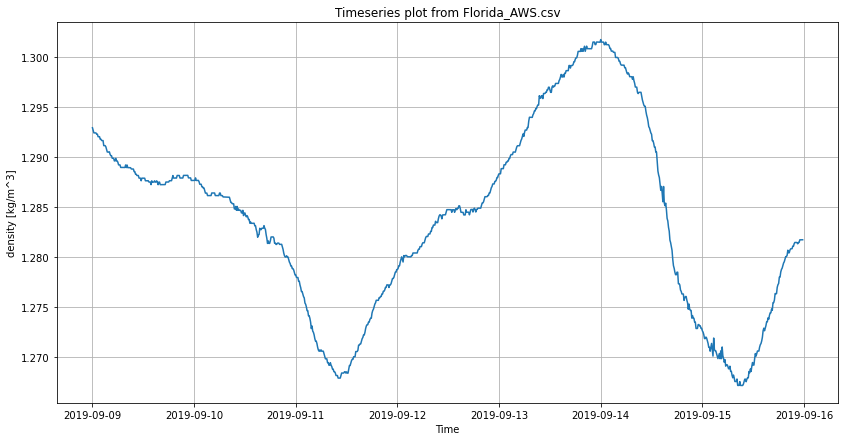

In [14]:
#INITIATE
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(14,7) )
#PLOT
ax.plot(data.index, data["density"])
plt.grid()
#SET LABELS
ax.set_title('Timeseries plot from Florida_AWS.csv')
ax.set_ylabel("density [kg/m^3]")
ax.set_xlabel("Time")

#FORMAT x-axis differently if you want
#ax.xaxis.set_major_locator( mdates.DayLocator(interval=1))   #tick every Day
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  #Display date on this format
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))   #tick every hour

plt.show()


**Multiple plots in one figure**

We initiate it multiple plots with:
<l>
<li> mfig, axs = plt.subplots( nrows = 7, ncols = 1, figsize = ( 14, 8 ), sharex = True )
<ul>
    <li>  nrows indicate numer of plots we want in the vertical, and ncols in the horizontal.
    <li>  axs contains the axis of all the different plots (here 7 different). You have to specify what plot you want on which axis.
</ul>
</l>

To read more about how subplots works; https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html

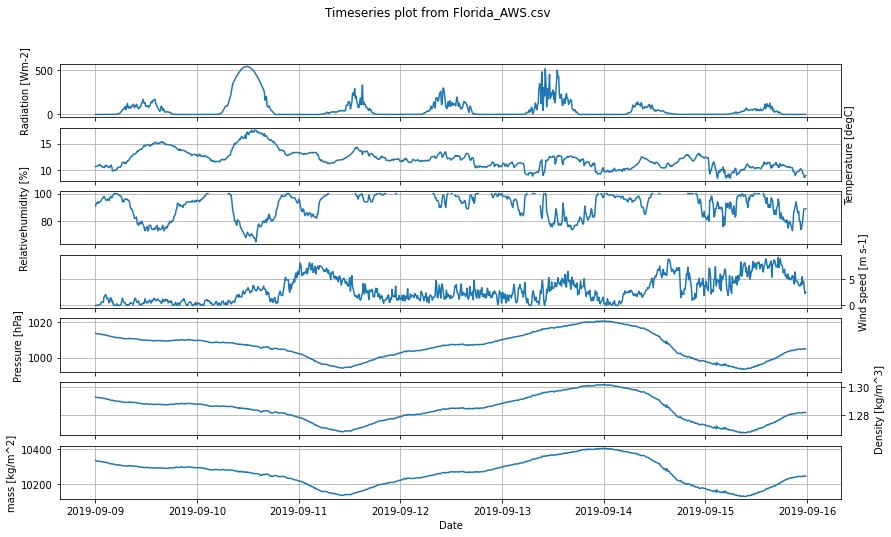

In [15]:
#INITIATE
mfig, axs = plt.subplots( nrows = 7, ncols = 1, figsize = ( 14, 8 ), sharex = True )
mfig.suptitle('Timeseries plot from Florida_AWS.csv')

#PLOT AND SET YLABELS

#plot1
axs[0].plot( data.index, data["Globalstraling"] )
axs[0].set_ylabel("Radiation [Wm-2]")
axs[0].grid('on', which='both', axis='both' )
#plot2
axs[1].plot( data.index, data["Lufttemperatur"] )
axs[1].set_ylabel("Temperature [degC]")
axs[1].yaxis.set_label_position("right") #Set label of yaxis to the right
axs[1].yaxis.tick_left()
axs[1].grid('on', which='both', axis='both' )
#plot3
axs[2].plot( data.index, data["Relativ luftfuktighet"] )
axs[2].set_ylabel("Relativehumidity [%]")
axs[2].grid('on', which='both', axis='both' )
#plot4
axs[3].plot( data.index, data["Vindstyrke"] )
axs[3].set_ylabel("Wind speed [m s-1]")
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].grid('on', which='both', axis='both' )
#plot5
axs[4].plot( data.index, data["Lufttrykk"] )
axs[4].set_ylabel("Pressure [hPa]")
axs[4].grid('on', which='both', axis='both' )
#plot6
axs[5].plot( data.index, data["density"] )
axs[5].set_ylabel("Density [kg/m^3]")
axs[5].yaxis.set_label_position("right")
axs[5].yaxis.tick_right()
axs[5].grid('on', which='both', axis='both' )
#plot7
axs[6].plot( data.index, data["massc"] )
axs[6].set_ylabel("mass [kg/m^2]")
axs[6].grid('on', which='both', axis='both' )

#SET X-LABEL
plt.xlabel("Date")

plt.show()



**Multiple lines in one plot**

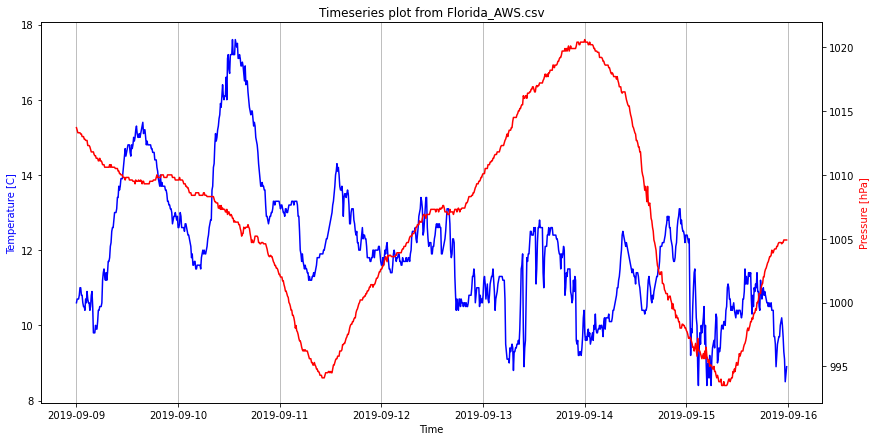

In [16]:
#INITIATE
fig, ax = plt.subplots( figsize=(14,7) )
plt.title('Timeseries plot from Florida_AWS.csv')

#PLOT
ax.plot(data.index, data["Lufttemperatur"], color="blue")
ax.set_ylabel("Temperature [C]", color="blue")

ax_twin1 = ax.twinx()  #Make a second axis
ax_twin1.plot(data.index, data["Lufttrykk"], color="red")
ax_twin1.set_ylabel("Pressure [hPa]", color = "red")

ax.grid("on", axis = "x")
ax.set_xlabel("Time")

plt.show()

## 4. (version2 ) Read a CSV file and perform simple calculations ( With the csv package)

Here we initiate an empty list (feks datetimeobj = []) before filling it with values in a for-loop that reads the csv file line by line. 

In [17]:
#INITIALISE THE VARIABLES WE WANT.
datetimeobj = []
radiation_obs = []          #W/m**2
temp_obs = []               #Celcius
rh_obs = []                 #%
wind_dir_obs = []           #Degree from north=0
wind_speed_obs  = []        #m/s
pressure_obs = []           #hPa

#reads the csv file line by line
with open('Florida_AWS.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        
        if line_count == 0:
            print(f'Columns in csv file are named; \n {", ".join(row)}')  
            line_count += 1
        else:
            # Removes unvalid numbers in file
            for value_indx in range(0,len(row)):
                if row[value_indx] == "9999.99":
                    row[value_indx] = np.nan
            #fills the empty lists with data
            datetimeobj.append( dt.datetime.strptime( row[0]+":"+row[1], '%Y-%m-%d:%H:%M' ))
            radiation_obs.append( float(row[2]) )
            temp_obs.append( float(row[3]) )
            rh_obs.append( float(row[4]) )
            wind_speed_obs.append( float(row[6]) )
            wind_dir_obs.append( float(row[5]) )
            pressure_obs.append( float(row[7]) )

datetimeobj[0:10]



Columns in csv file are named; 
 ﻿Dato, Tid, Globalstraling, Lufttemperatur, Relativ luftfuktighet, Vindretning, Vindstyrke, Lufttrykk


[datetime.datetime(2019, 9, 9, 0, 2),
 datetime.datetime(2019, 9, 9, 0, 12),
 datetime.datetime(2019, 9, 9, 0, 22),
 datetime.datetime(2019, 9, 9, 0, 32),
 datetime.datetime(2019, 9, 9, 0, 42),
 datetime.datetime(2019, 9, 9, 0, 52),
 datetime.datetime(2019, 9, 9, 1, 2),
 datetime.datetime(2019, 9, 9, 1, 12),
 datetime.datetime(2019, 9, 9, 1, 22),
 datetime.datetime(2019, 9, 9, 1, 32)]

From above we can see that we have a observed value every 10 minutes

**Simple calculations**

We can add new calculated variables to the dataframe.

In [18]:
#Calculate air density assuming dry air 
#- > Using equation:  rho = p / ( Rd * Tv) that we will learn more about in the course
Rd = 287
density = [x*100/(y+273.15*Rd) for x, y in zip(pressure_obs, temp_obs)]

#Calculate mass of an atmospheric column of unit area
#- > Using equation: m = P/g that we will learn more about in the course
g = 9.81
massc = [x*100/g for x in pressure_obs]



## 5. (version 2) Plot graphs
Since we stored the data from the csv file in seperated lists, we just plot it like normal (pandas had a special plotting options not used here).


**Plotting a single figure**

This is done the same way as the examples above


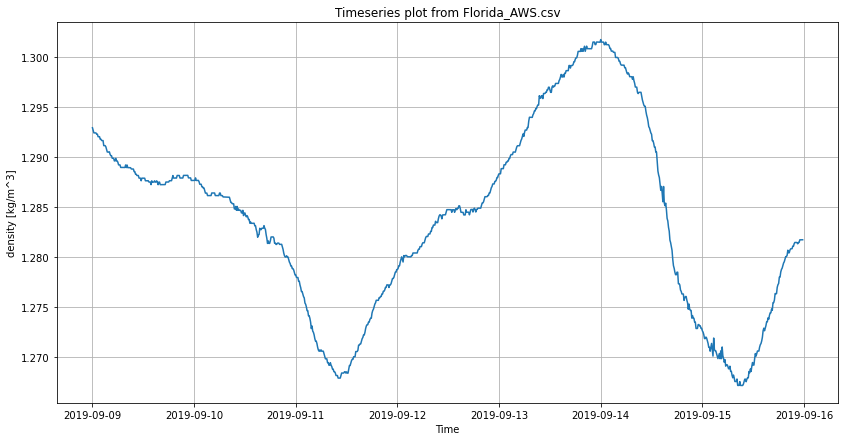

In [19]:
#INITIATE
fig, ax = plt.subplots( figsize=(14,7) )
#PLOT
ax.plot(datetimeobj, density)
plt.grid()
#SET LABELS
ax.set_title('Timeseries plot from Florida_AWS.csv')
ax.set_ylabel("density [kg/m^3]")
ax.set_xlabel("Time")

#FORMAT x-axis differently if you want
#ax.xaxis.set_major_locator( mdates.DayLocator(interval=1))   #tick every Day
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  #Display date on this format
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))   #tick every hour

plt.show()
